<a href="https://colab.research.google.com/github/PaulToronto/IBM---AI-Engineering-Professional-Certificate/blob/main/1_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.2 Regression

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1.1.1 Linear Regression

### 1.2.1.1 Introduction to Regression

#### What is regression?

- **Regression** is the process of predicting a continuous value
- Two types of variables
    - **y**: dependent variable
        - must be a continuous variable
    - **X**: independent variable

#### What is a regression model?

- The model is used to make predictions
- Two types:
    1. Simple Regression
        - One independent variable is used to predict a dependent variable
        - Two types
            - Simple Linear Regression
            - Simple Non-linear Regression
    2. Multiple Regression
        - When more than one independent variable
        - Two types:
            - Multiple Linear Regresssion
            - Multiple Non-linear Regression

#### Regression algorithms

- Ordinal regression
- Poisson regression
- Fast forest quantile regression
- Linear, Polynomial, Lasso, Stepwise, Ridge regression
- Bayesian linear regression
- Neural network regression
- Decision forest regression
- Boosted decision tree regression
- KNN (K-nearest neighbours)

### 1.2.1.2 Simple Linear Regression

#### Linear regression topology

- Simple Linear Regression
    - Predict `CO2EMISSION` vs. `ENGINESIZE` of all cars
        - Independent variable (x): `ENGINESIZE`
        - Dependent variable (y): `CO2EMISSION`
- Multiple Linear Regression
    - Predict `CO2EMISSION` vs. `ENGINESIZE` and `CYLINDERS` of all cars
        - Indpependent variable (X): `ENGINESIZE`, `CYLINDERS`, etc
        - Dependent variable (y): `CO2EMISSION`

#### Prediction

The fit line is shown traditionally as a polynomial:

$$
\widehat{y} = \theta_{0} + \theta_{1}x_{1}
$$

- $\widehat{y}$ is the predicted value
- $\theta_{0}$ and $\theta_{1}$ are the coefficients of the linear equation
- linear regression calculates the coefficients to find the best line to fit the data
- the residual error:

$$
Error = y - \widehat{y}
$$

- Mean Squared Error
$$
MSE = \frac{1}{n}\sum\left(y_{i} - \widehat{y}_{i}\right)^{2}
$$

- The objective is to find the line where the MSE is minimizied
- There are two options to do this
 1. A mathematical approach
 2. An optimization approach

In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
data_url += 'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/'
data_url += 'labs/Module%202/data/FuelConsumptionCo2.csv'

data = pd.read_csv(data_url)
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
data_simple = data[['ENGINESIZE', 'CO2EMISSIONS']]
data_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ENGINESIZE    1067 non-null   float64
 1   CO2EMISSIONS  1067 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


#### Estimating the parameters (mathematical approach)

$$
\begin{align}
\widehat{y} &= \theta_{0} + \theta_{1}x_1 \\\\
\theta_{1} &= \frac{\sum_{i=1}^s\left(x_{i} - \bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{s}\left(x_{i} - \bar{x}\right)^{2}} \\\\
\theta_{0} &= \bar{y} - \theta_{1}\bar{x}
\end{align}
$$



In [4]:
def theta1(x, y):
    s = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    return ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()

def theta0(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    return y_mean - theta1(x, y) * x_mean

coef_1 = theta1(data_simple['ENGINESIZE'], data_simple['CO2EMISSIONS'])
coef_0 = theta0(data_simple['ENGINESIZE'], data_simple['CO2EMISSIONS'])
coef_1, coef_0

(39.12519978671174, 125.30409949535684)

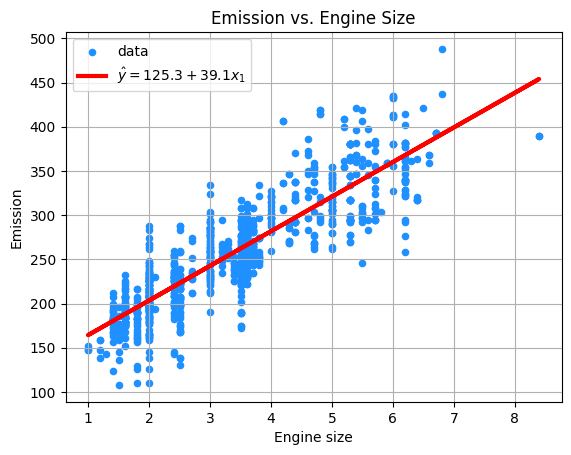

In [5]:
data_simple.plot(kind='scatter', x='ENGINESIZE', y='CO2EMISSIONS', color='dodgerblue', label='data')
plt.plot(data_simple['ENGINESIZE'],
         coef_0 + coef_1 * data_simple['ENGINESIZE'],
         linewidth=3, color='red', label=f'$\hat{{y}} = {coef_0.round(1)} + {coef_1.round(1)}x_{{1}}$')
plt.title('Emission vs. Engine Size')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.grid()
plt.legend()

plt.show()

#### Pros of linear regression

- Very fast
- No parameter tuning
- Easy ot understand and highly interpretable

### 1.2.1.3 Model Evaluation in Regression Models

#### Two Types of Evaluation

1. Train and Test on the same dataset
2. Train/Test split

#### Train and Test on the same dataset

- Train with the entire dataset to build a model
- Select a subset to test the model
    - Labels are not used for prediction, they are used only as ground truth
    - Compare our predicted values with the ground truth
- This is likely to result in high **training accuracy** and low **out-of sample accuracy**

#### Training accuracy vs. out-of-sample accuracy

- Training accuracy
    - Percenage of correct predictions that the model makes when using the test dataset
    - Not necessarily a good thing
    - Result of over-fitting
        - The model is overly trained to the dataset, which may capture noise and produce a non-generalized model
- Out-of-sample accuracy
    - Percentage of correct predictions that the model makes on data that the model has not been trained on
    - It's important that our models have a high, out-of-sample accuracy
    - How can we improve out-of-sample accuracy?
        - Use the second approach: Train/Test split

#### Train/Test Split

- Train on a portion the dataset
- Test on another portion of the dataset
- This provides a more accurate evaluation on out-of-sample accuracy
- Higly dependent on which datasets the data is trained and tested
    - K-fold cross validation solves most of these issues
- After the evaluation, be sure to train the model with the entire dataset so as not to lose potentially valuable data

#### K-fold cross-validation

- Say we use 4 folds:
 1. Split the dataset into 4 "folds" of equal size
 2. Use each subsequent fold as the test set, and the rest of the dataset for training
    - Each time the accuracy is calculated
 3. The result of 4 evaluations are averaged
    - This produces a more consistent out-of-sample accuracy

#### Metrics to calculate the accuracy of our model:

In the context of regression, the error is the difference between the data points and the trend line generated by the algorithm.

1. **Mean Absolute Error (MAE)**: The average distance between the actual and predicted values for all rows.

$$
MAE = \frac{1}{n}\sum_{j=1}^{n}\lvert y_j - \widehat{y}_j\rvert
$$

2. **Mean Squared Error**: The average squared distance between the actual predicted values for all rows. The squared term increases large errors exponentially in comparison to smaller errors. This is a more popular choice than MAE for that reason.

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}\left(y_i - \widehat{y}_i\right)^2
$$

3. **Root Mean Squared Error (RMSE)**: The square root of the average squared distance between the actual predicted values for all rows. This is the most popular metric because it is interpretable in the same units as the response vector, $y$.

$$
RMSE = \sqrt{\frac{1}{n}\sum_{j=1}^{n}\left(y_j - \widehat{y}_j\right)^2}
$$

4. **Relative Absolute Error (RAE)**: Measures the average absolute difference between actual and predicted values relative to the average absolute difference between actual values and their mean. Another way of saying this is that it takes the total absolute error and normalizes it.

$$
RAE = \frac{\sum_{j=1}^{n}\lvert y_j - \widehat{y}_j\rvert}{\sum_{j=1}^{n}\lvert y_j - \bar{y}\rvert}
$$

5. **Relative Squared Error (RSE)**: Widely adopted by the Data Science community because it is used to calculate $R^2$ (r-squared)

$$
RSE = \frac{\sum_{j=1}^{n}\left( y_j - \widehat{y}_j\right)^2}{\sum_{j=1}^{n}\left( y_j - \bar{y}\right)^2} = \frac{RSS}{TSS}
$$

6. **$R^2$**: This is not an error per say, but it is a popular metric for the accuracy of your model. It represents how close the data values are to the fitted regression line. The higher the $R^2$, the better your model fits the data.

$$
R^{2} = 1 - RSE
$$


7. **Residual Sum of Squares (RSS)**: Calculates the sume of the squared distance between actual and predicted values.

$$
RSS = \sum_{i=1}^{n}\left(y_i - \widehat{y}_i\right)^2
$$

8. **Total Sum of Squares (TSS)**:

$$
TSS = \sum_{i=1}^{n}\left(y_i - \bar{y}\right)^2
$$



### 1.2.1.4 Multiple Linear Regression

1. Simple Regression
    - One independent variable is used to predict a dependent variable
    - Two types
        - Simple Linear Regression
        - Simple Non-linear Regression
2. Multiple Regression
    - When more than one independent variable
    - Two types:
        - Multiple Linear Regresssion
        - Multiple Non-linear Regression

#### Examples of multiple linear regression

Two applications for multiple linear regression

 1. When we want to identify ndependent variables effectiveness on prediction
   - Does revision time, test anxiety, lecture attendance and gender have any effect on the exam performance of students?
 2. Predicting impacts of changes
   - How much does blood pressure go up (or down) for every unmit increase (or decrease) in the BMI of a patient?

#### Predicting continuous values with multiple linear regression

- Like simple linear regression, multiple linear regression is a method of **predicting a continuous variable**
- It uses multiple independent variables (or predictors) to predict the value of the target variable (aka dependent variable)
- The targe variable, $y$, is a linear combination of independent variables.

$$
\widehat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

- It can also be expressed as a dot product of two vectors, the parameters vector, $\theta^T$, and the feature set vector, $X$.

$$
\widehat{y} = \theta^TX
$$

$$
\theta^T = \left[\theta_0, \theta_1, \theta_2, ..., \theta_n\right]
$$

$$
X = \begin{bmatrix}
1 \\
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
$$

- Optimized parameters are those that lead to a model with the fewest errors
- Residual error for one row:

$$
Error = y_i - \widehat{y}
$$

- The mean of all residual errors shows how bad the model is in representing the dataset, it is called the **Mean Squared Error**

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}\left(y_i - \widehat{y}_i\right)^2
$$

- While this is not the only way to expose the error of a multiple linear regression model, it is one of the most popular ways to do so
- The objective of multiple linear regression is to minimize the **MSE**



#### Estimating multiple linear regression parameters

- How to estimate $\theta$?
- There are many ways to do this, but the two most common methods are:
 1. **Ordinary least squares**
   - Tries to estimate the values of the coefficients by minimizing the **MSE**
   - This approach uses the data as a matrix and uses linear algebra operations to estimate the optimal values for $\theta$
   - Con: time complexity of calculating matrix operations. Can be very slow. This techniques is only viable if the dataset has less than 10K rows
 2. Optimization algorithm
   - The error is reduced iteratively
   - Example: **Gradient Descent**

#### Making predictions with multiple linear regression

- As simple as solving an equation for a specific set of inputs

$$
\widehat{y} = \theta^TX
$$

#### Q&A on multiplelnear regression

- How many idependent variables should you use?
 - Adding variables does not always increase the accuracy of the model
 - Adding variables can result in overfitting
  - too complicated for you dataset and not general enough to be used for prediction
- Should independent variables be continuous?
 - Categorical variables can be incorporated by converting them to numeric variables
- What are the linear relationships between the dependent variable and the independent variables?
 - Linear regression is a specific type of regression in which there must be a linear relationship between the dependent variable and each of your independent variables
  - Use scatter plots to visually check for linearity
  - If the relationship is not lienar, you need to use **non-linear regression**

